# MTA Data Challenges

In [2]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter

### Challenge 1

In [3]:
 #!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

In [4]:
with open('data/turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [5]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [6]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

In [7]:
raw_readings.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [('NR',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005938862',
   '0003304207'),
  ('NR',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005938915',
   '0003304220'),
  ('NR',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005938934',
   '0003304249'),
  ('NR',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005939047',
   '0003304407'),
  ('NR',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005939329',
   '0003304623'),
  ('NR',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005939679',
   '0003304886'),
  ('NR',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005939870',
   '0003304930'),
  ('NR',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005939929',
   '0003304939'),
  ('NR',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005939946',
   '0003304953'),
  ('NR',
   'BMT',
   '06/21/2015',
   '12:00:00',
   

`raw_readings` is a solution to Challenge 1.

### Challenge 2

In [8]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [9]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [10]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [11]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [12]:
print all_counts[:1200]

[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [13]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (0.03611111111111111, 24), (3.963888888888889, 24)]


In [14]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

`datetime_counts` is a solution to Challenge 2.

In [23]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

0.99415985405


In [24]:
all_good_counts.sort()
print all_good_counts[-5:]

[2848, 2920, 2926, 2926, 3488]


In [25]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


### Challenge 3

In [26]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

`day_counts` is a solution to Challenge 3.

In [27]:
day_counts

{('A030',
  'R083',
  '01-06-00',
  '23 ST-5 AVE'): [(datetime.date(2015, 6, 20),
   1008), (datetime.date(2015, 6, 21), 767), (datetime.date(2015, 6, 22),
   2438), (datetime.date(2015, 6, 23), 2651), (datetime.date(2015, 6, 24),
   2680), (datetime.date(2015, 6, 25), 2683), (datetime.date(2015, 6, 26),
   1951)],
 ('N134',
  'R385',
  '00-00-00',
  'ROCKAWAY BLVD'): [(datetime.date(2015, 6, 20),
   2), (datetime.date(2015, 6, 21), 3), (datetime.date(2015, 6, 22),
   9), (datetime.date(2015, 6, 23), 5), (datetime.date(2015, 6, 24),
   11), (datetime.date(2015, 6, 25), 9), (datetime.date(2015, 6, 26), 7)],
 ('B014',
  'R148',
  '00-00-01',
  'PARKSIDE AVE'): [(datetime.date(2015, 6, 20),
   1489), (datetime.date(2015, 6, 21), 1356), (datetime.date(2015, 6, 22),
   2073), (datetime.date(2015, 6, 23), 2106), (datetime.date(2015, 6, 24),
   2180), (datetime.date(2015, 6, 25), 2131), (datetime.date(2015, 6, 26),
   2044)],
 ('A013',
  'R081',
  '01-03-00',
  '49 ST-7 AVE'): [(datetime.date

Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

%matplotlib inline
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

import matplotlib.pyplot as plt
Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

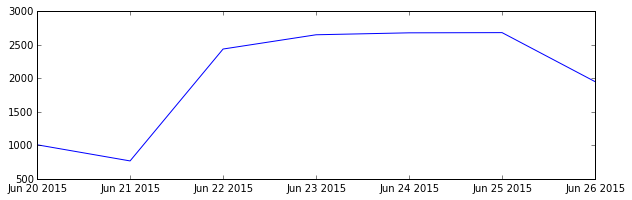

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

dates = []
counts = []
for row in day_counts[('A030',
  'R083',
  '01-06-00',
  '23 ST-5 AVE')] :
    dates.append(row[0])
    counts.append(row[1])

plt.figure(figsize=(10,3)) 
plt.plot(dates,counts)

Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [49]:
ctrl_unit_day_counts = {}
for turnstyle, row in day_counts.items() :
    key = (turnstyle[0], turnstyle[1], turnstyle[3])
    print key
    if key in ctrl_unit_day_counts:
        print "PREV", ctrl_unit_day_counts[key]
        print "ROW", row
        #ctrl_unit_day_counts[key] += row
        print "NEXT", ctrl_unit_day_counts[key]
    #else:
        #ctrl_unit_day_counts[key] = row
    print 'LOOP',row ###ctrl_unit_day_counts[key]
    

 ('A030', 'R083', '23 ST-5 AVE')
LOOP [(datetime.date(2015, 6, 20), 1008), (datetime.date(2015, 6, 21), 767), (datetime.date(2015, 6, 22), 2438), (datetime.date(2015, 6, 23), 2651), (datetime.date(2015, 6, 24), 2680), (datetime.date(2015, 6, 25), 2683), (datetime.date(2015, 6, 26), 1951), (datetime.date(2015, 6, 20), 753), (datetime.date(2015, 6, 21), 523), (datetime.date(2015, 6, 22), 1462), (datetime.date(2015, 6, 23), 1495), (datetime.date(2015, 6, 24), 1654), (datetime.date(2015, 6, 25), 1637), (datetime.date(2015, 6, 26), 1298), (datetime.date(2015, 6, 20), 2223), (datetime.date(2015, 6, 21), 1773), (datetime.date(2015, 6, 22), 4245), (datetime.date(2015, 6, 23), 4366), (datetime.date(2015, 6, 24), 4660), (datetime.date(2015, 6, 25), 4426), (datetime.date(2015, 6, 26), 3436), (datetime.date(2015, 6, 20), 713), (datetime.date(2015, 6, 21), 572), (datetime.date(2015, 6, 22), 1248), (datetime.date(2015, 6, 23), 1392), (datetime.date(2015, 6, 24), 1368), (datetime.date(2015, 6, 25), 1